In [1]:
%load_ext autoreload
%autoreload 2

import os
import matplotlib.pyplot as plt
import numpy as np

import PyLasMech as plm

### Read well log datas

In [4]:
TVDLogFiles=plm.FileFinder("../Data/Drilling",fext=".las")

[IO] Found 9 log files


,FileName,Location
0,15_9-F-11B_MUD_LOG.las,..\Data\Drilling\15_9-F-11B\15_9-F-11B_MUD_LOG...
1,15_9-F-12_log.las,..\Data\Drilling\15_9-F-12\15_9-F-12_log.las
2,15_9-F-14_log.las,..\Data\Drilling\15_9-F-14\15_9-F-14_log.las
3,15_9-F-15C_log.las,..\Data\Drilling\15_9-F-15C\15_9-F-15C_log.las
4,15_9-F-15D_MUD_LOG.las,..\Data\Drilling\15_9-F-15D\15_9-F-15D_MUD_LOG...
5,15_9-F-1B_MUD_LOG.las,..\Data\Drilling\15_9-F-1B\15_9-F-1B_MUD_LOG.las
6,15_9-F-1C_MUD_LOG.las,..\Data\Drilling\15_9-F-1C\15_9-F-1C_MUD_LOG.las
7,15_9-F-4_log.las,..\Data\Drilling\15_9-F-4\15_9-F-4_log.las
8,15_9-F-5_log.las,..\Data\Drilling\15_9-F-5\15_9-F-5_log.las


In [5]:
WellLog=plm.ReadLas(TVDLogFiles[2])

[IO] Reading F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-14\15_9-F-14_log.las.....
[Warnning] Data size (359,92) is in-comptabile with depth/depth_step!
Done!


[LAS Info]
Well Name= 15_9-F-14
Start/Step/End Depth=(145.900000:10.000000:3729.860000)
NULL value= -9999.25
Common Depth= (145.9, 3729.86)


,Curves,Available Depth (Non-NULL),Raw Min/Max Val,Unit,Comments
0,DEPT,"[145.9, 3729.86]","[145.9, 3729.86]",m,User PyLasMech curve
1,DVER,"[145.9, 3729.86]","[145.9, 3145.78]",m,User PyLasMech curve


	Auto Depth Range= (145.9, 3729.86) for  ['DEPT', 'DVER']


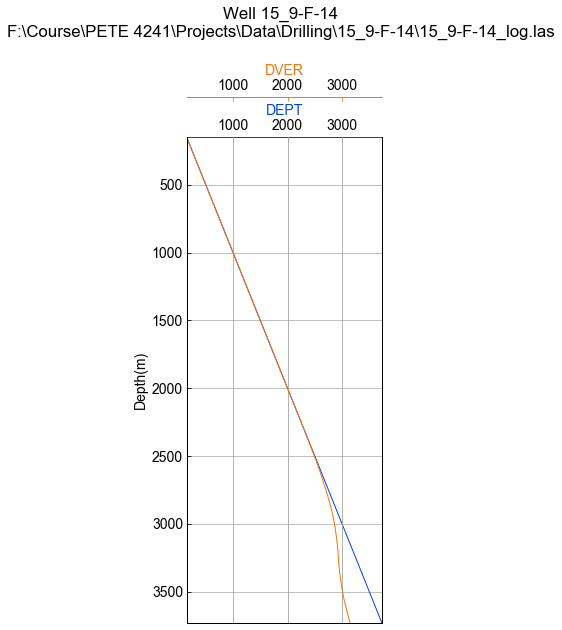

In [6]:
plm.printLas(WellLog)
#Plot logs with auto depth range
MD_range=WellLog.plm_param.MinMaxVal[0]
TVD_range=WellLog.plm_param.MinMaxVal[1]
Common_range=[min(MD_range+TVD_range),max(MD_range+TVD_range)]
Xlim={"DEPT":Common_range,"DVER":Common_range}
fig=plm.plotLogs(LogData=WellLog,CurveNames=["DEPT","DVER"],XLims=Xlim)

In [7]:
WellLogFiles=plm.FileFinder("../Data/Petrophysics",fext=".las")

[IO] Found 9 log files


,FileName,Location
0,15_9-F-11B_INPUT.LAS,..\Data\Petrophysics\15_9-F-11B\15_9-F-11B_INP...
1,15_9-F-12_INPUT.LAS,..\Data\Petrophysics\15_9-F-12\15_9-F-12_INPUT...
2,15_9-F-14_INPUT.las,..\Data\Petrophysics\15_9-F-14\15_9-F-14_INPUT...
3,15_9-F-15C_INPUT.las,..\Data\Petrophysics\15_9-F-15C\15_9-F-15C_INP...
4,15_9-F-15D_INPUT.LAS,..\Data\Petrophysics\15_9-F-15D\15_9-F-15D_INP...
5,15_9-F-1B_INPUT.LAS,..\Data\Petrophysics\15_9-F-1B\15_9-F-1B_INPUT...
6,15_9-F-1C_INPUT.LAS,..\Data\Petrophysics\15_9-F-1C\15_9-F-1C_INPUT...
7,15_9-F-4_INPUT.las,..\Data\Petrophysics\15_9-F-4\15_9-F-4_INPUT.las
8,15_9-F-5_INPUT.las,..\Data\Petrophysics\15_9-F-5\15_9-F-5_INPUT.las


In [8]:
#assert TVDLog.plm_param.WellName.lower()!=WellLog.plm_param.WellName.lower(),\
#       "Working on different well %s\t%s!" %(TVDLog.plm_param.WellName,WellLog.plm_param.WellName)

for i in range(len(WellLogFiles)):
    TVDLog=plm.ReadLas(TVDLogFiles[i])
    WellLog=plm.ReadLas(WellLogFiles[i])

    print("Well Interp Check %s\t%s!" % (TVDLog.plm_param.WellName,WellLog.plm_param.WellName))

    from scipy import interpolate
    MDvals=WellLog[0]
    MDvals_unit=WellLog.curves[0].unit.lower()
    
    MD=TVDLog["DEPT"]
    TVD_unit=TVDLog.curves["DEPT"].unit.lower()
    if(MDvals_unit!=TVD_unit and TVD_unit=="f"): MD=MD*0.3048
    if(MDvals_unit!=TVD_unit and TVD_unit=="m"): MD=MD/0.3048
    TVD=TVDLog["DVER"]
    
    print("Interpable depth range=",TVDLog.plm_param.AvailDepth[0])
    print("Request depth range=",WellLog.plm_param.AvailDepth[0])
    TVDvals=np.interp(MDvals,MD,TVD,left=np.nan,right=np.nan)

    assert len(TVDvals)==len(MDvals), "Shape is not compatible"

    plm.appendCurve(WellLog,'TVD', TVDvals, unit='M',descr='True Vertical Depth from PyLasMech')

    fpath="../Data/Petrophysics"#Save all new files at the root of petrophysics
    fname=WellLog.plm_param.WellName+"_TVDlog.las"
    fname=os.path.join(fpath,fname)
    fname
    plm.saveLas(WellLog,fname)

[IO] Reading F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-11B\15_9-F-11B_MUD_LOG.las.....
Done!
[IO] Reading F:\Course\PETE 4241\Projects\Data\Petrophysics\15_9-F-11B\15_9-F-11B_INPUT.LAS.....
[Warnning] Data size (45817,45818) is in-comptabile with depth/depth_step!
Done!
Well Interp Check 15_9-F-11 B	15_9-F-11 B!
Interpable depth range= [8481.0, 15649.5]
Request depth range= [188.5, 4770.2]
Write Las file @ ../Data/Petrophysics\15_9-F-11 B_TVDlog.las
[IO] Reading F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-12\15_9-F-12_log.las.....
[Warnning] Data size (350,210) is in-comptabile with depth/depth_step!
Done!


Header section Parameter regexp=~P was not found.


[IO] Reading F:\Course\PETE 4241\Projects\Data\Petrophysics\15_9-F-12\15_9-F-12_INPUT.LAS.....
Done!
Well Interp Check 15_9-F-12	15_9-F-12!
Interpable depth range= [0.0, 3495.52]
Request depth range= [239.8776, 4186.7328]
Write Las file @ ../Data/Petrophysics\15_9-F-12_TVDlog.las
[IO] Reading F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-14\15_9-F-14_log.las.....
[Warnning] Data size (359,92) is in-comptabile with depth/depth_step!
Done!
[IO] Reading F:\Course\PETE 4241\Projects\Data\Petrophysics\15_9-F-14\15_9-F-14_INPUT.las.....
Done!
Well Interp Check 15_9-F-14	15_9-F-14!
Interpable depth range= [145.9, 3729.86]
Request depth range= [566.0, 12302.0]
Write Las file @ ../Data/Petrophysics\15_9-F-14_TVDlog.las
[IO] Reading F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-15C\15_9-F-15C_log.las.....
[Warnning] Data size (306,17) is in-comptabile with depth/depth_step!
Done!
[IO] Reading F:\Course\PETE 4241\Projects\Data\Petrophysics\15_9-F-15C\15_9-F-15C_INPUT.las.....
[Warnning] D

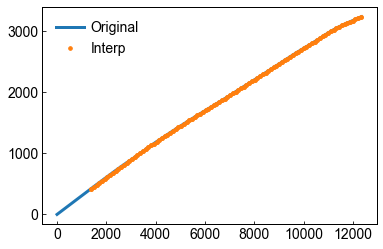

In [9]:
#Interpolation checking

skip=int(len(MDvals)/100)
#skip=1
plt.plot(MD, TVD, '-',lw=3)
plt.plot(MDvals[::skip], TVDvals[::skip], 'o')
plt.legend(["Original","Interp"])
plt.show()